# Using the Wisconsin Breast Cancer Dataset
# we will perform the following:
    1. Caclulate the mean, median and standard deviation of the "perimeter" feature of the input data
    2. Figure out if the first feature is normally distributed?
       If it isn't then what could be a more appropriate distribution?
    3. Train and compare the results between two classifiers:
       SVM & Logistic Regression. 
    
 

Please note: The data file is attached to this repository and should be kept in the same directory from which the notebook is being executed. 

In [39]:
#Import libraries
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np

In [40]:
# Setup training data
# and define the various coloumn headers 

training_data_filename = "data.csv"

id_header = "id"
diagnosis_header = "diagnosis"
radiusMean_header = "radius_mean"
textureMean_header = "texture_mean"
perimeterMean_header = "perimeter_mean"
areaMean_header = "area_mean"
smoothnessMean_header = "smoothness_mean"
compactnessMean_header = "compactness_mean"
concavityMean_header = "concavity_mean"
concavePointsMean_header = "concave points_mean"
symmetryMean_header = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSe_header = "radius_se"
textureSe_header = "texture_se"
perimeterSe_header = "perimeter_se"
areaSe_header = "area_se"
smoothnessSe_header = "smoothness_se"
compactnessSe_header = "compactness_se"
concavitySe_header = "concavity_se"
concavePointsSe_header = "concave points_se"
symmetrySe_header = "symmetry_se"
fractalDimensionSe_header = "fractal_dimension_se"
radiusWorst_header = "radius_worst"
textureWorst_header = "texture_worst"
perimeterWorst_header = "perimeter_worst"
areaWorst_header = "area_worst"
smoothnessWorst_header = "smoothness_worst"
compactnessWorst_header = "compactness_worst"
concavityWorst_header = "concavity_worst"
concavePointsWorst_header = "concave points_worst"
symmetryWorst_header = "symmetry_worst"
fractalDimensionWorst_header = "fractal_dimension_worst"

In [41]:
# Read training data from the "data.csv"
input_data_coloumns = [ id_header, diagnosis_header, radiusMean_header, textureMean_header, perimeterMean_header,
                       areaMean_header, smoothnessMean_header, compactnessMean_header, concavityMean_header,
                       concavePointsMean_header, symmetryMean_header, fractalDimensionMean, radiusSe_header, 
                       textureSe_header, perimeterSe_header, areaSe_header, smoothnessSe_header, compactnessSe_header,
                       concavitySe_header, concavePointsSe_header, symmetrySe_header, fractalDimensionSe_header, 
                       radiusWorst_header, textureWorst_header, perimeterWorst_header, areaWorst_header, smoothnessWorst_header,
                       compactnessWorst_header, concavityWorst_header, concavePointsWorst_header, symmetryWorst_header,
                       fractalDimensionWorst_header]

# Reading the data using Pandas. We will skip the first row because it contains headers. 
training_data = pd.read_csv(training_data_filename, names=input_data_coloumns, delimiter=',', skiprows=1)

## Caculate the mean, median and standard deviation of the "perimeter" feature of the input data

In [42]:
# Using pandas we will calculate the mean, median and standard deviation of the "periemter" feature
# of the input data.
perimeter_feature_mean = training_data['perimeter_mean'].mean()
perimeter_feature_median = training_data['perimeter_mean'].median()
perimeter_feature_standardDeviation = training_data['perimeter_mean'].std()
print('The mean value of the perimenter feature is: ', perimeter_feature_mean)
print('The median value of the perimenter feature is: ', perimeter_feature_median)
print('The standard deviation of the perimenter feature is: ', perimeter_feature_standardDeviation)

# The other way to calculatae mean, median and standard deviation along with other attributes is 
# by using the describe function. Here the 50% value describes the median.
print("\nCalculating mean, median & standard deviation using the describe() function:")
print(training_data['perimeter_mean'].describe())

print("\nThe 50% value is the median value for the \"perimeter_mean\" feature")

The mean value of the perimenter feature is:  91.96903339191566
The median value of the perimenter feature is:  86.24
The standard deviation of the perimenter feature is:  24.2989810387549

Calculating mean, median & standard deviation using the describe() function:
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

The 50% value is the median value for the "perimeter_mean" feature


## Figure out if the "radius" feautre is normally distributed or not

### Check which feature is normally distributed

In [43]:
# To find out if the "radius" feature is normally distributed of not
# we will first calculate the mean and standard deviation of the feature.

radius_feature_mean = training_data['radius_mean'].mean()
radius_feature_standardDeviation = training_data['radius_mean'].std()

# Now we will check if the data is normally ditributed or not using numpy.
radius_feature_distribution = abs(np.random.normal(radius_feature_mean, radius_feature_standardDeviation, 1)) < 0.5
print(radius_feature_distribution)

[False]


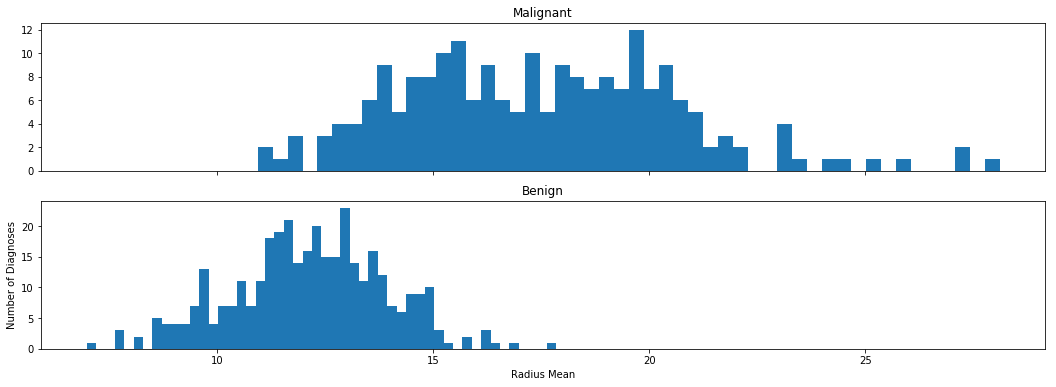

In [44]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,6))

bins = 50

ax1.hist(training_data.radius_mean[training_data.diagnosis == "M"], bins)
ax1.set_title('Malignant')

ax2.hist(training_data.radius_mean[training_data.diagnosis == "B"], bins)
ax2.set_title('Benign')

plt.xlabel('Radius Mean')
plt.ylabel('Number of Diagnoses')
plt.show()

Based on the above results we can confirm that the radius feature for the Malignant Tumors isn't normally distributed but are more uniformly distributed.  

The Benign tumors are more normally distributed. 

# Train and compare the results between two classifiers:
  ## SVM & Logistic Regression

### Preparing the dataset 
* The data will be split into 80-20.
   * 80% for training & 20% for testing

In [45]:
r_data = training_data.drop([id_header, diagnosis_header, radiusMean_header, textureMean_header, perimeterMean_header], axis=1)
r_features = r_data.columns

In [46]:
# Because we are performing Binary Classification, i.e. classifying only 2 values, Malignan & Benign,
# we will now create our datasets. 
# First we will change the values for Malignan & Benign from "M" & "B" to 1 for Malignan 
# 0 for Beningn

training_data.loc[training_data.diagnosis == "M"] == 1
training_data.loc[training_data.diagnosis == "B"] == 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
training_data.loc[training_data.diagnosis == 0, 'benign'] = 1
training_data.loc[training_data.diagnosis == 1, 'benign'] = 0


In [48]:
# training_data['benign'] = training_data.benign.astype(int)

In [50]:
training_data = training_data.rename(columns={'diagnosis': 'malignant'})


In [51]:
print(training_data.benign.value_counts())
print()
print(training_data.malignant.value_counts())

Series([], Name: benign, dtype: int64)

B    357
M    212
Name: malignant, dtype: int64


In [52]:
pd.set_option("display.max_columns",101)
training_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
Malignant = training_data[training_data.malignant == 1]
Benign = training_data[training_data.benign == 1]
train_X = Malignant.sample(frac = (4/5))
count_Malignants = len(train_X)
bs =Benign.sample(0.8)
train_X = pd.concat([train_X, bs], axis = 0)
test_X = train_data.loc[~training_data.index.isin(train_X.index)]
train_X = shuffle(train_X)
test_X = shuffle(test_X)
train_Y = train_X.malignant
train_Y = pd.concat([train_Y, train_X.benign], axis=1)
test_Y = test_X.malignant
test_Y = pd.concat([test_Y, test_X.benign], axis=1)
train_X = train_X.drop(['malignant','benign'], axis = 1)
test_X = test_X.drop(['malignant','benign'], axis = 1)

ValueError: a must be greater than 0

In [63]:
features = train_X.columns.values

NameError: name 'train_X' is not defined

In [64]:
for feature in features:
    mean, std = training_data[feature].mean(), training_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

NameError: name 'features' is not defined

In [65]:
learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 

In [66]:
input_nodes = train_X.shape[1]


NameError: name 'train_X' is not defined

In [67]:
num_labels = 2


In [ ]:
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]
